# Experiments on SIR

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def target_function(x):
    return (np.sin(x)+1.5)/(3*np.pi)

def proposal_pdf(x):
    return 1/2*np.pi


def RIS(target_fuction, proposal_pdf,num_samples):
    num_iterations = 100000
    # Choose samples based on weights
    sample_chosen = []
    for i in range(num_iterations):
        # Generate random samples from uniform distribution
        proposal_samples = np.random.uniform(0, 2*np.pi, num_samples)

        # Calculate weights
        weights = [target_fuction(sample) / proposal_pdf(sample) for sample in proposal_samples]
        weights /= np.sum(weights)

        # Choose one sample at a time based on weights
        chosen_sample = np.random.choice(proposal_samples, p=weights)
        sample_chosen.append(chosen_sample)


    # Plotting
    plt.figure(figsize=[6, 4])
    # Calculate PDF curve
    counts, bins = np.histogram(sample_chosen, bins=100, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.plot(bin_centers, counts, color='red', label='SIR PDF')  # Plot PDF curve
    x = np.linspace(0, 2*np.pi, 100)  
    target_distribution = [target_fuction(i) for i in x]
    plt.plot(x, target_distribution, label="$target distribution$")
    plt.xlabel("Sample", size=18)
    plt.ylabel("pdf", size=18)
    plt.legend(prop={"size": 14}) 
    plt.show()

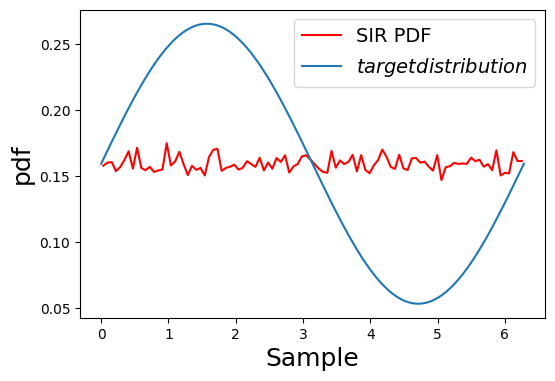

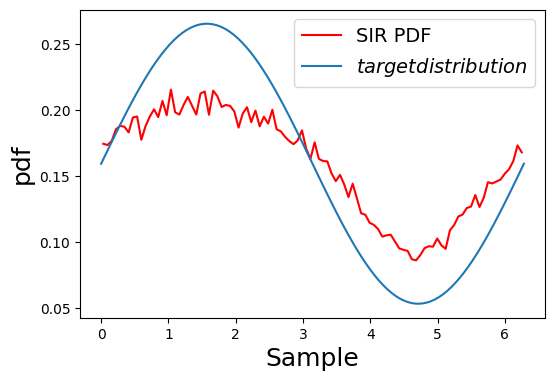

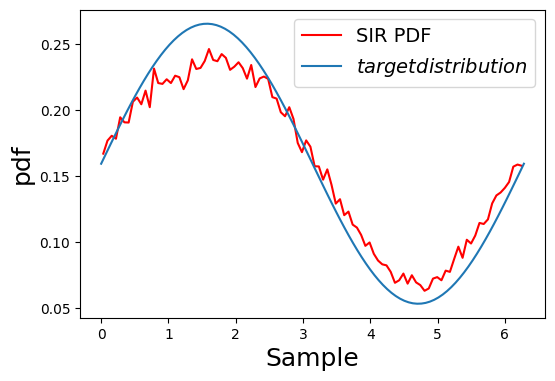

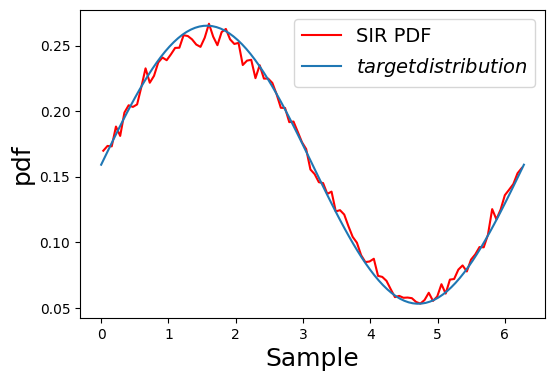

In [9]:
RIS(target_function, proposal_pdf,num_samples = 1)
RIS(target_function, proposal_pdf,num_samples = 2)
RIS(target_function, proposal_pdf,num_samples = 4)
RIS(target_function, proposal_pdf,num_samples = 16)


# Experiments on RIS